In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Loading our Data into a Pandas Dataframe

In [73]:
df = pd.read_csv("heart (1).csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [74]:
df.describe() # random look at our five (5) points summary of all numerical column of our dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [75]:
df.columns #checking all the columns present in our dataset

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [76]:
# The code below shows how many null values we have for each column
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

DATA UNDERSTANDING
This is an optimized method of finding out more about the data. (i.e. data composition, attributes, and distribution). 

**Data at Glance**

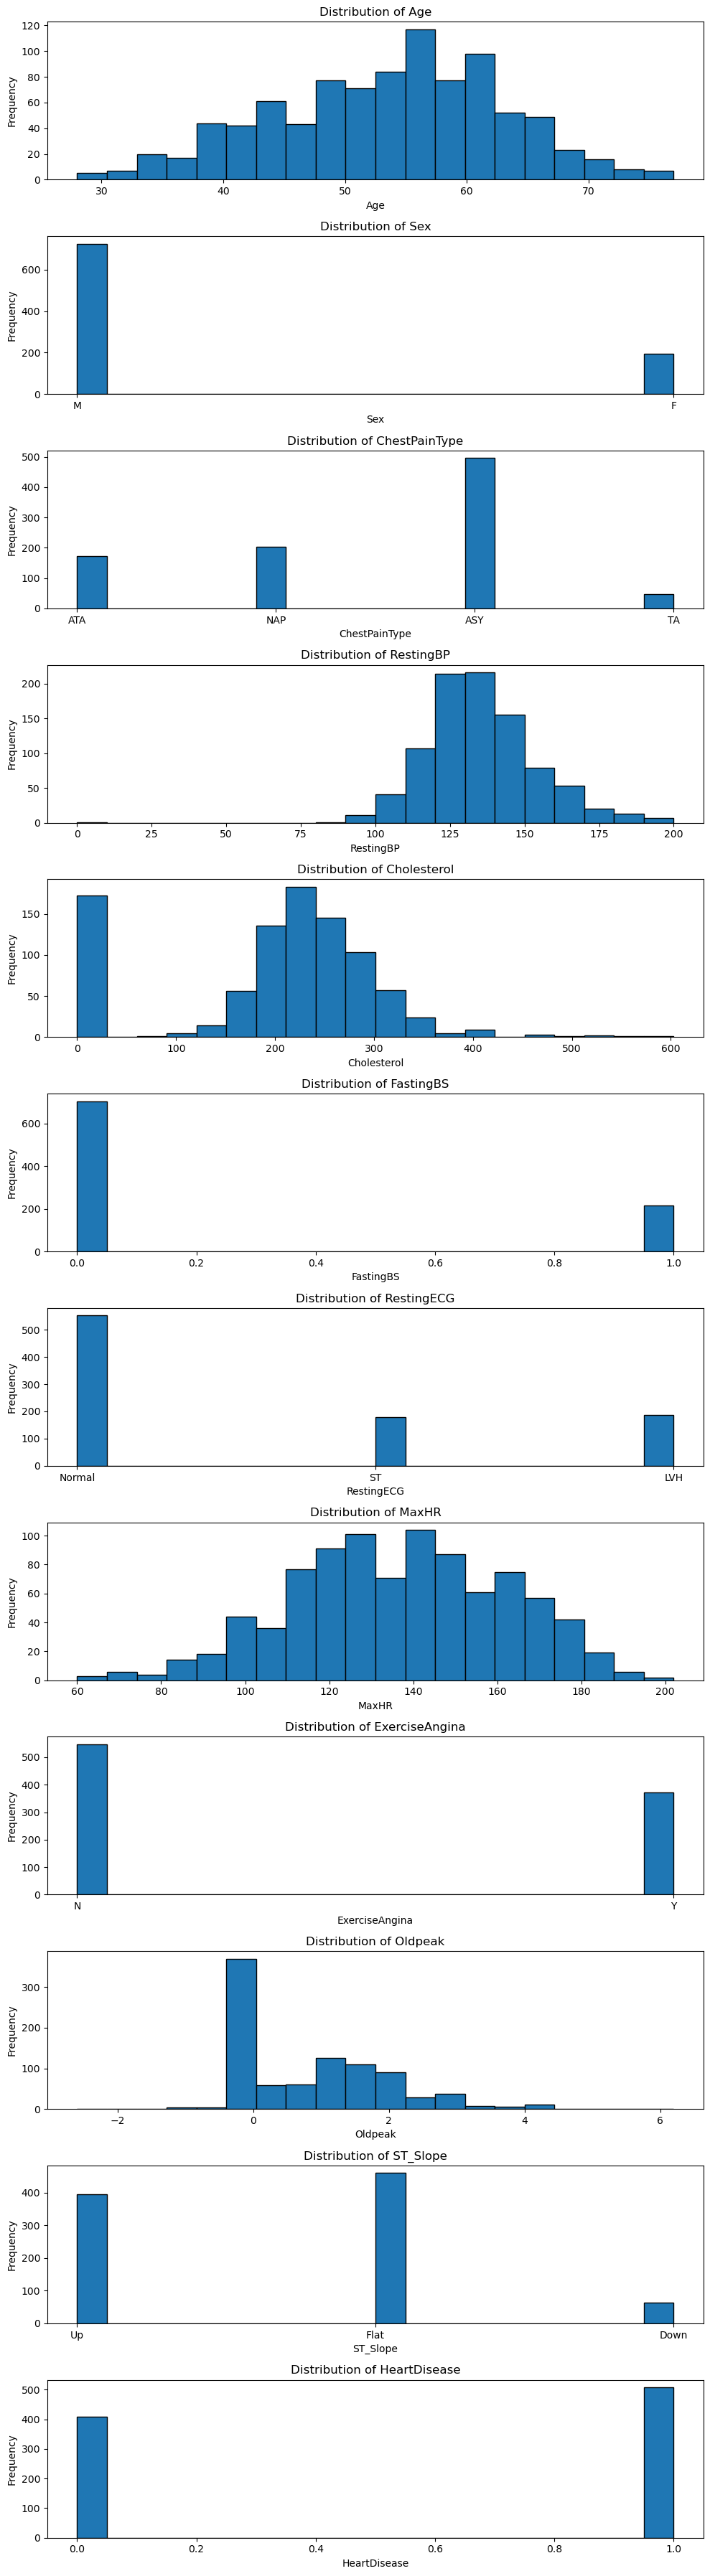

In [80]:
# We wish to look at the data points in each column (i.e column distributions) 

# First step is set up the plot grid
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, num_columns * 3))

# Second step is plot histograms for each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    df[column].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # Remove all gridlines


plt.tight_layout()
plt.show()


From the graphs above, we uncover there are missing values replaced with zeros in both the RestingBP and Cholesterol columns. Scientifically, it's proven that it's impossible to have zero as the record for Cholesterols and Resting BP in patients. This must have been a data entry issue or zeros were used as a placeholder for the missing data in these columns. For best practices for our model, we will replace the zeros (0) with the mean of these columns.

In [82]:
# Next, Let's replace the zeros in RestingP and Cholesterol with the mean of these columns
columns_to_replace = ['RestingBP', 'Cholesterol']

for col in columns_to_replace:
    # Calculate mean excluding zeros
    mean_value = df[col][df[col] != 0].mean()
    # Replace zeros with the calculated mean
    df[col] = df[col].replace(0, mean_value)

print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0        289.0          0     Normal   
1     49   F           NAP      160.0        180.0          0     Normal   
2     37   M           ATA      130.0        283.0          0         ST   
3     48   F           ASY      138.0        214.0          0     Normal   
4     54   M           NAP      150.0        195.0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA      110.0        264.0          0     Normal   
914   68   M           ASY      144.0        193.0          1     Normal   
915   57   M           ASY      130.0        131.0          0     Normal   
916   57   F           ATA      130.0        236.0          0        LVH   
917   38   M           NAP      138.0        175.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [83]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [84]:
# Save the cleaned file for report building on power bi
# df.to_csv("Heart_clean.csv" , index = False)

Now that we have cleaned and replaced the missing values or zero in our RestingBP and Cholesterol columns, let's look at their new composition.

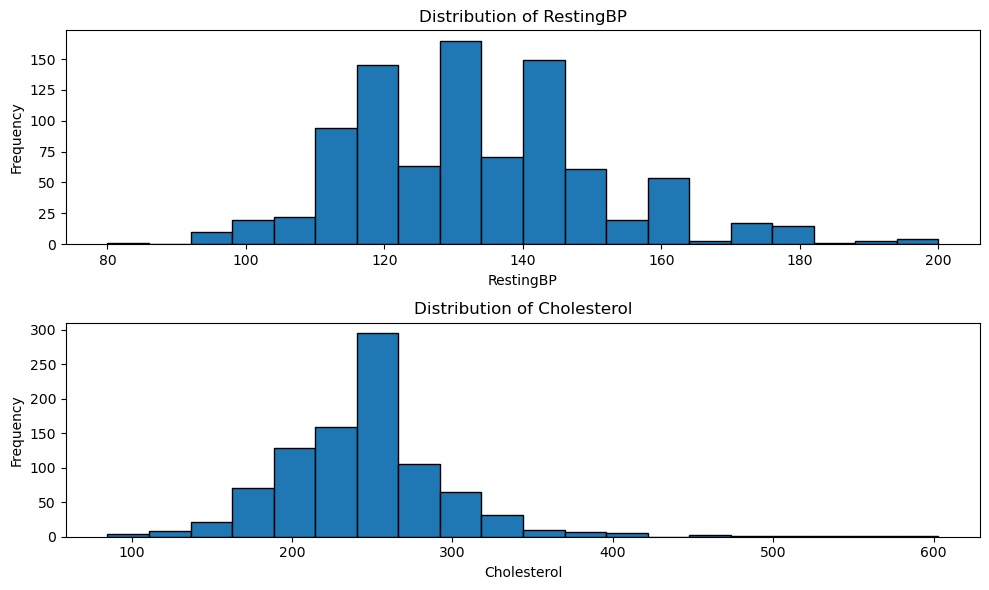

In [87]:
# Specifying the columns we want to plot
columns_to_plot = ['RestingBP', 'Cholesterol']  # Replace with the column names you want to plot

# Setting up the plot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, len(columns_to_plot) * 3))

# If there's only one column, we want to that ensure axes is a list for consistency
if len(columns_to_plot) == 1:
    axes = [axes]

# Plotting histograms for the selected columns
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # Remove all gridlines

plt.tight_layout()
plt.show()


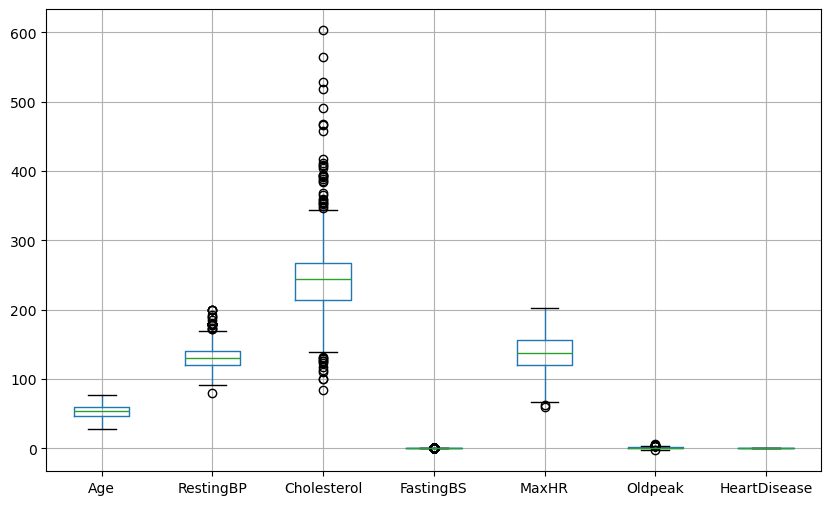

In [88]:
# This is a plot of our NUMERICAL columns especially those with some outliers.
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.show()

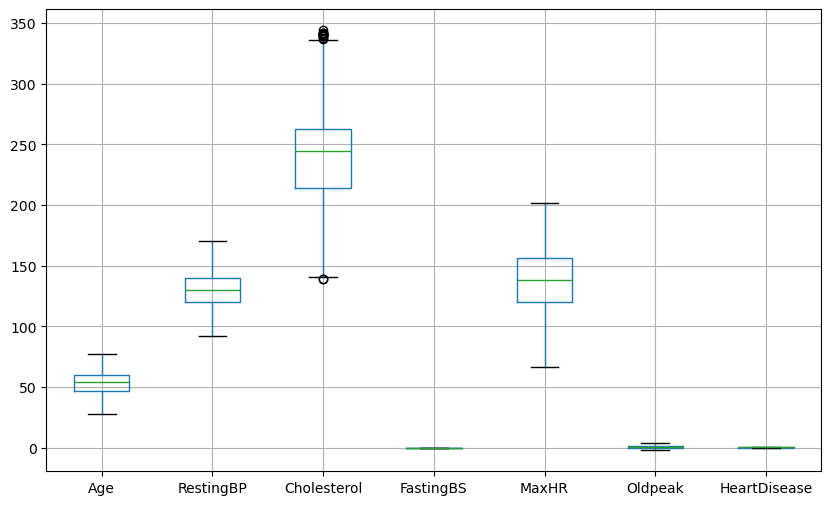

In [89]:
# Calculating our Interquartile and Finding/displaying the Outliers for all numerical columns 1 - 7. All Features

for label in ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']:

    q3, q1 = np.percentile(df[label], [75 ,25])
    iqr = q3 - q1
    lower_lim = q1 - 1.5*iqr
    upper_lim = q3 + 1.5*iqr
    df[label] = df[label].mask((df[label]<lower_lim)|(df[label]>upper_lim), np.nan)

plt.figure(figsize=(10, 6))  
df.boxplot()
plt.show()
    

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       891 non-null    float64
 4   Cholesterol     877 non-null    float64
 5   FastingBS       704 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           916 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         902 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [91]:
# Now, we know there are some nan (null values) from our outliers. We will remove the null (nan) values and reset our column index.

df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             643 non-null    int64  
 1   Sex             643 non-null    object 
 2   ChestPainType   643 non-null    object 
 3   RestingBP       643 non-null    float64
 4   Cholesterol     643 non-null    float64
 5   FastingBS       643 non-null    float64
 6   RestingECG      643 non-null    object 
 7   MaxHR           643 non-null    float64
 8   ExerciseAngina  643 non-null    object 
 9   Oldpeak         643 non-null    float64
 10  ST_Slope        643 non-null    object 
 11  HeartDisease    643 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 60.4+ KB


In [93]:
# Let's check the correlation between our columns or across the datasets.
X = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]

# Compute the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
X.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.251165,0.082413,NaN,-0.407984,0.263852,0.295909
RestingBP,0.251165,1.000000,0.020862,NaN,-0.107643,0.180103,0.130974
Cholesterol,0.082413,0.020862,1.000000,NaN,-0.017865,0.040036,0.107557
FastingBS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,-0.407984,-0.107643,-0.017865,NaN,1.000000,-0.225518,-0.398788
Oldpeak,0.263852,0.180103,0.040036,NaN,-0.225518,1.000000,0.456465
HeartDisease,0.295909,0.130974,0.107557,NaN,-0.398788,0.456465,1.000000


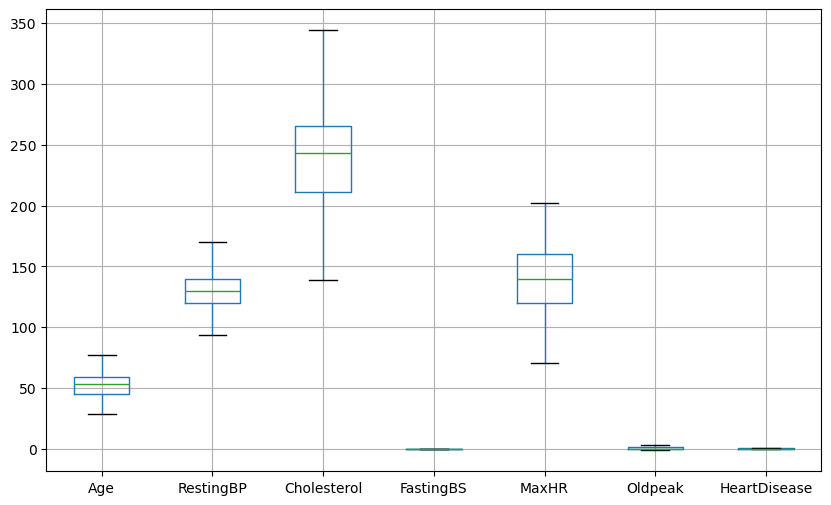

In [94]:
# Now, let's plot our box plot again to see the new look. All seems to look good now.
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.show()

Next, **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) is like the first conversation we’re having with the dataset introduced for this project. This is where we learn more about the data, its quirks, strengths, and secrets. It’s the foundation for getting a deep insight into the data before it’s then used in building a reliable model.

Section A - Bivariate Analysis: Comparing 'Age' and 'HeartDisease' with one another.

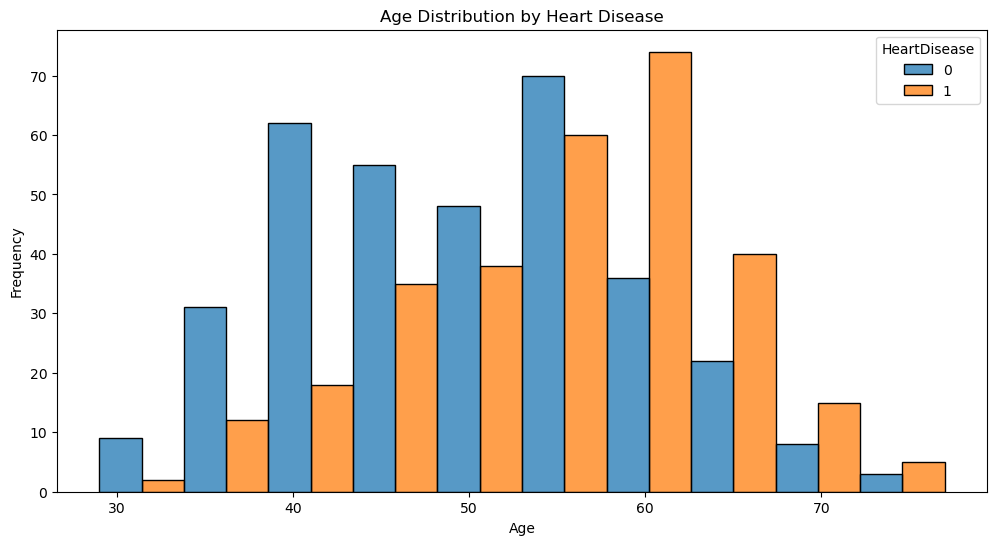

In [99]:
# Let's plot a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='dodge', bins=10)  # 'hue' separates by HeartDisease
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Section B (i) - Multivariate Analysis: Compare Cholesterol Level and Maximum Heart Rate By Chest Pain Type

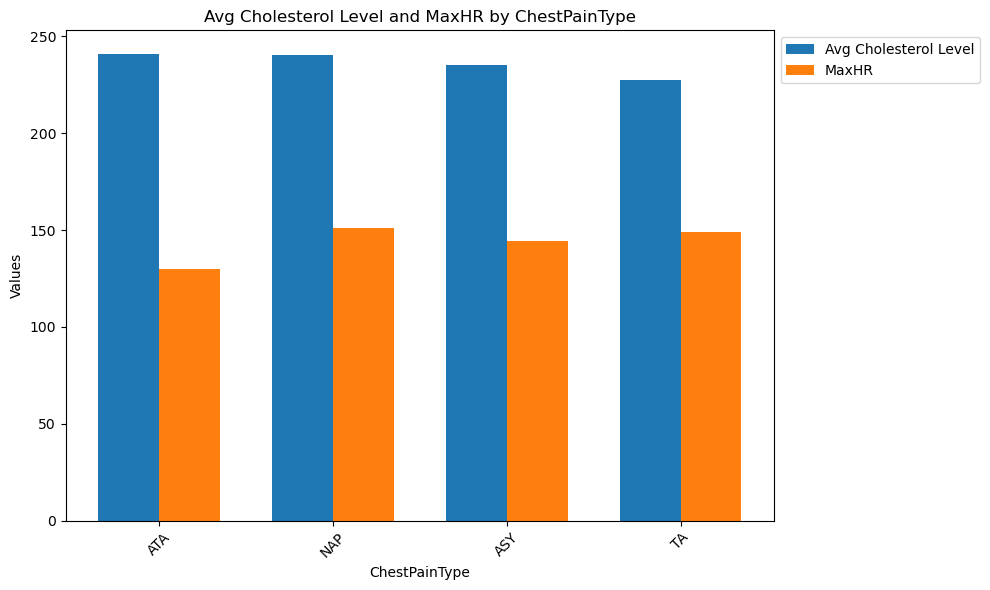

In [101]:
# Start by creating figure and axis
plt.figure(figsize=(10, 6))

# Next, create bar width
bar_width = 0.35
index = np.arange(len(df['ChestPainType'].unique()))  # Unique categories in smoking_status

# Bar plot for 'avg_cholesterol_level'
plt.bar(index, df.groupby('ChestPainType')['Cholesterol'].mean(), bar_width, label='Avg Cholesterol Level')

# Bar plot for 'MaxHR' next to 'avg_glucose_level'
plt.bar(index + bar_width, df.groupby('ChestPainType')['MaxHR'].mean(), bar_width, label='MaxHR')

# Set titles and labels
plt.xlabel('ChestPainType')
plt.ylabel('Values')
plt.title('Avg Cholesterol Level and MaxHR by ChestPainType')
plt.xticks(index + bar_width / 2, df['ChestPainType'].unique(), rotation=45)  # Set xticks
# plt.legend() 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


ii. Multivariate Analysis: Compare Resting Electrocardiogram results and ST Slope By Resting Blood Pressure

<Figure size 1000x600 with 0 Axes>

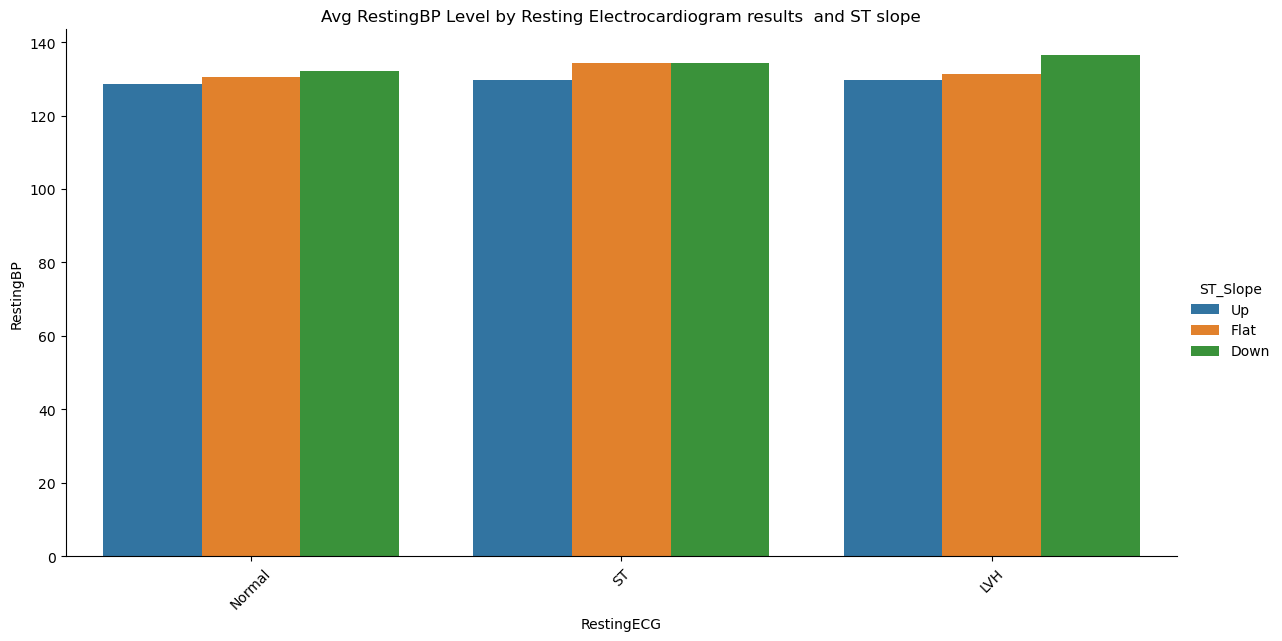

<Figure size 1000x600 with 0 Axes>

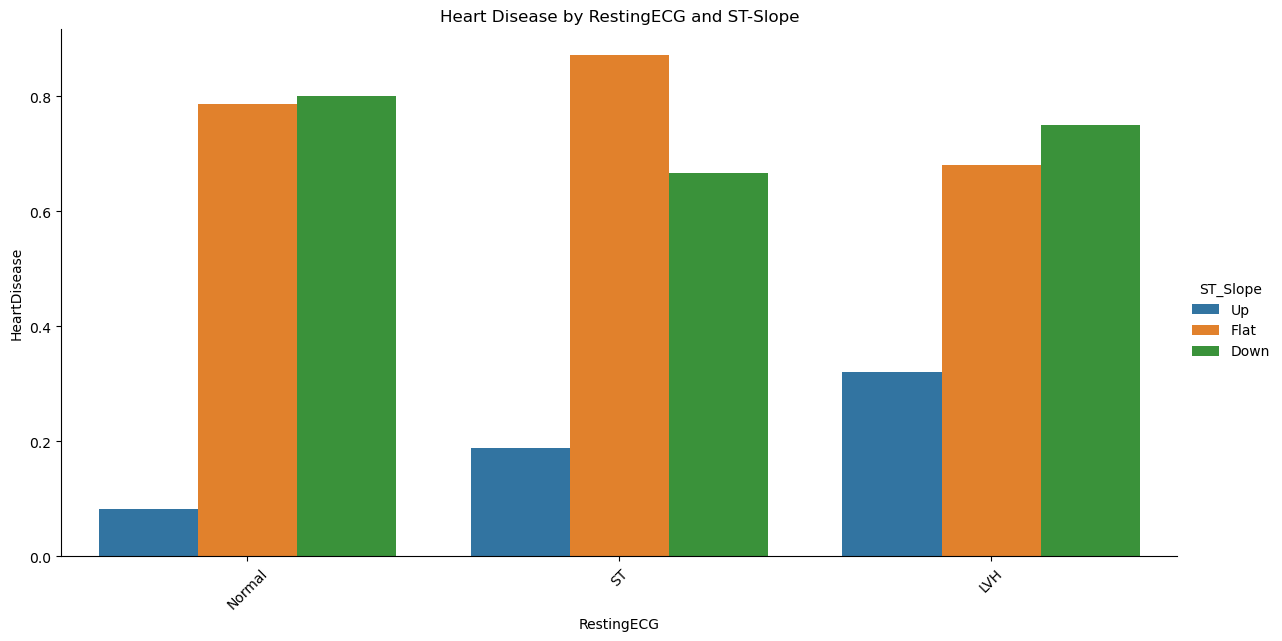

In [103]:
# Plot for avg_resting_bp comparison
plt.figure(figsize=(10, 6))
sns.catplot(x='RestingECG', y='RestingBP', hue='ST_Slope', kind='bar', data=df, height=6, aspect=2, errorbar=None)
plt.title('Avg RestingBP Level by Resting Electrocardiogram results  and ST slope')
plt.xticks(rotation=45)
plt.show()

# Plot for Heart Disease comparison
plt.figure(figsize=(10, 6))
sns.catplot(x='RestingECG', y='HeartDisease', hue='ST_Slope', kind='bar', data=df, height=6, aspect=2, errorbar=None)
plt.title('Heart Disease by RestingECG and ST-Slope')
plt.xticks(rotation=45)
plt.show()

Next: **BUILD OUR MODEL**

In [105]:
# Our Dataframe is named df
# We are checking the data types and converting categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# We are defining features (X) and target (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Now, we are Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's time to initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Now, let's make predictions on the test set
y_pred = rf_model.predict(X_test)

# Finally, evaluating our model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.86      0.83      0.84        58

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129



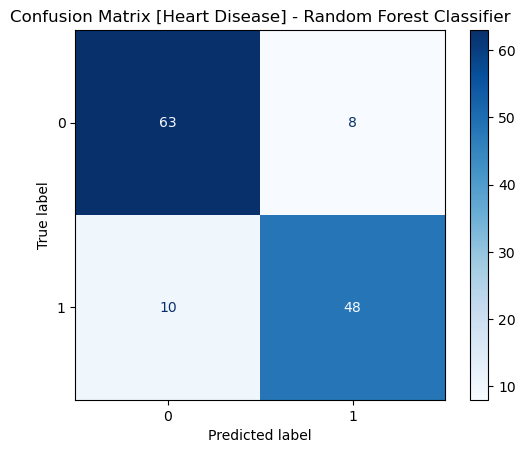

In [106]:
# Let's quickly generate a confusion matrix to review the performance of our Model.
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')

# Adding a title
plt.title("Confusion Matrix [Heart Disease] - Random Forest Classifier")
plt.show()


Let's plot an ROC curve to assess the effectiveness of the Model as well.

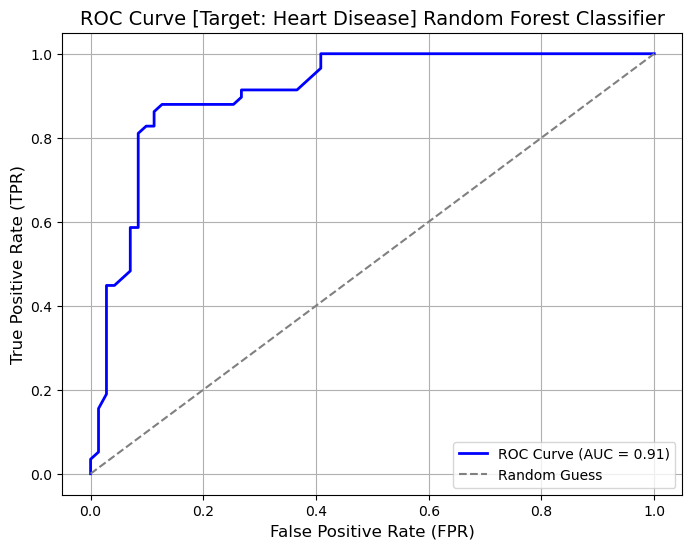

In [133]:
# Getting predicted probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# Adding labels and legend
plt.title("ROC Curve [Target: Heart Disease] Random Forest Classifier", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
Next, Is Model Deployment Phase but will not be covered 